## 1) Image properties

In [2]:
from image import Image, ImageProperties, ImageFilters

In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
img = Image('../Images/original (1).png')
ImageProperties.summary(img)

{'filename': '../Images/original (1).png',
 'image_tensor shape': (800, 1200, 3),
 'brightness': 0.09348198,
 'contrast': 0.12460346,
 'range': (0.0, 1.0),
 'aspect_ratio': (800, 1200),
 'std_deviation': 0.12460346,
 'skewness': 3.304379883628898}

In [5]:
img.data[0][0]

array([0.05882353, 0.06666667, 0.01568628], dtype=float32)

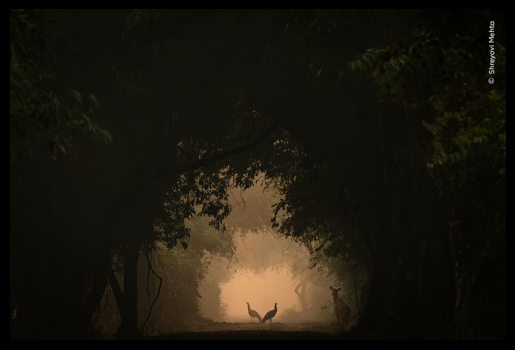

In [6]:
img.display()

## 2) Filters

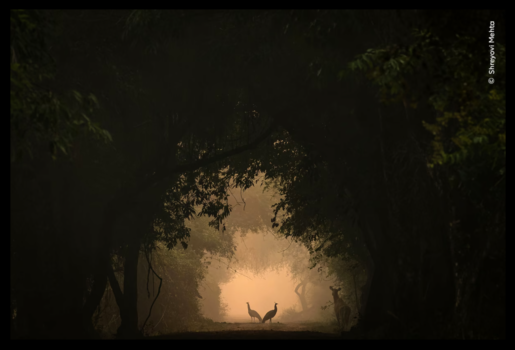

In [7]:
ImageFilters.gaussian_blur(img).display()

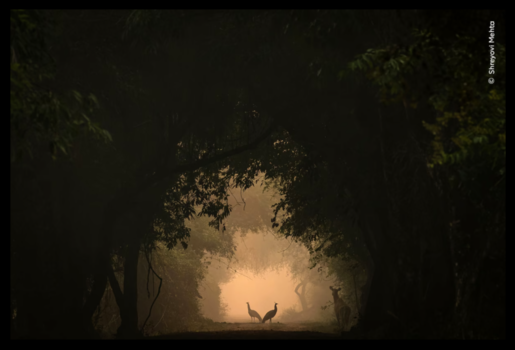

In [8]:
ImageFilters.average(img).display()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


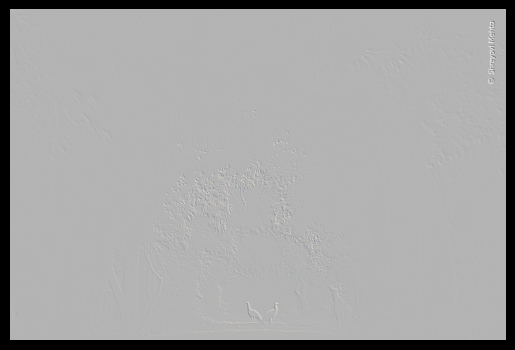

In [9]:
ImageFilters.edge_detection(img).display()

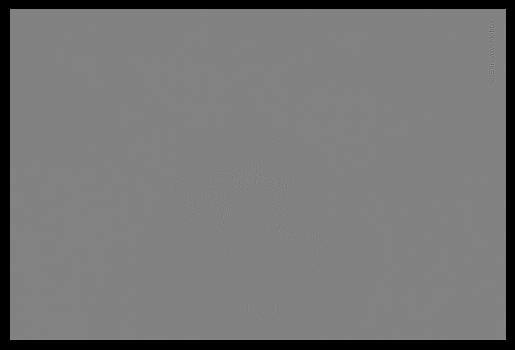

In [10]:
ImageFilters.laplacian(img).display()

## RGB image

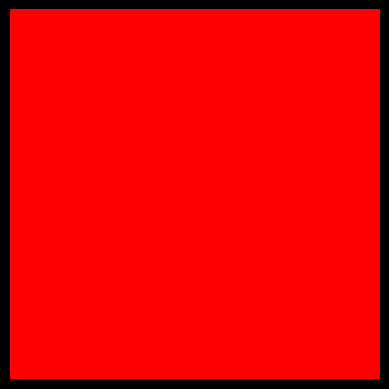

[255   0   0]


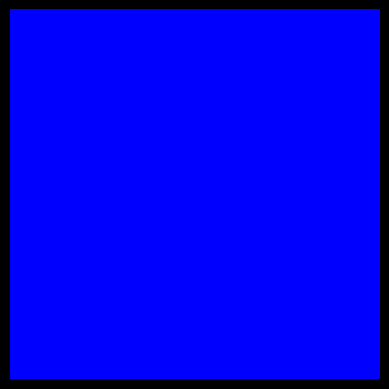

[  0   0 255]


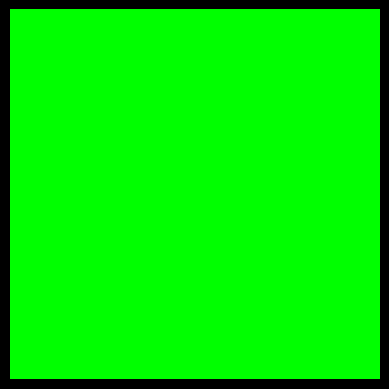

[  0 255   0]


In [11]:
from image import Image
import numpy as np
l = 256

img_r = Image()
img_b = Image()
img_g = Image()

img_r.data = np.zeros((l,l,3),dtype=np.uint8)
img_r.data[:,:,0] = 255
img_r.display() 
print(img_r.data[0][0])

img_b.data = np.zeros((l,l,3),dtype=np.uint8)
img_b.data[:,:,2] = 255
img_b.display()
print(img_b.data[0][0])

img_g.data = np.zeros((l,l,3),dtype=np.uint8)
img_g.data[:,:,1] = 255
img_g.display()
print(img_g.data[0][0])




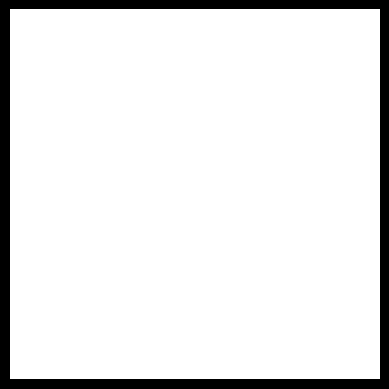

[255 255 255]


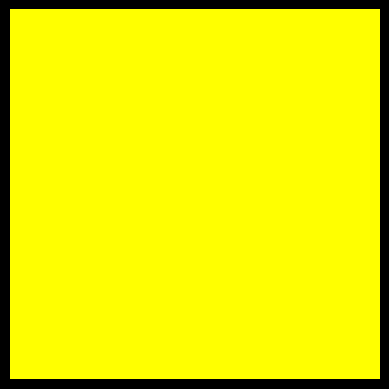

[255 255   0]


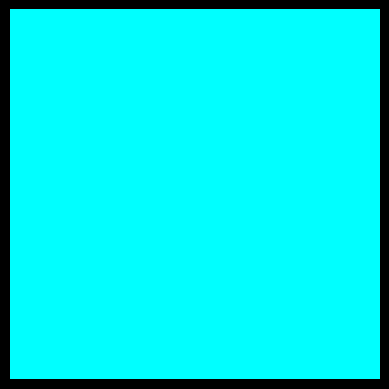

[  0 255 255]


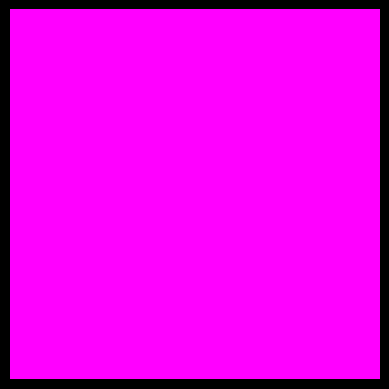

[255   0 255]


In [12]:
def combine(weight_r,weight_g,weight_b):
    img = Image()
    img.data = np.zeros((l,l,3),dtype=np.uint8)
    img.data = np.int16(weight_r*img_r.data + weight_g*img_g.data + weight_b*img_b.data)
    return img

img_w = combine(1,1,1)
img_w.display()
print(img_w.data[0][0])

img_y = combine(1,1,0)
img_y.display()
print(img_y.data[0][0])

img_c = combine(0,1,1)
img_c.display()
print(img_c.data[0][0])

img_m = combine(1,0,1)
img_m.display()
print(img_m.data[0][0])

In [13]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

def update_image(weight_r, weight_g, weight_b):
    combined_img = combine(weight_r, weight_g, weight_b)
    plt.imshow(combined_img.data)
    plt.axis('off')
    plt.show()

r_slider = widgets.FloatSlider(value=0.33, min=0, max=1, step=0.01, description='Red weight:')
g_slider = widgets.FloatSlider(value=0.33, min=0, max=1, step=0.01, description='Green weight:')
b_slider = widgets.FloatSlider(value=0.33, min=0, max=1, step=0.01, description='Blue weight:')

# Interactive display
ui = widgets.VBox([r_slider, g_slider, b_slider])
out = widgets.interactive_output(update_image, {'weight_r': r_slider, 'weight_g': g_slider, 'weight_b': b_slider})

display(ui, out)


Output()